In [58]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#from scipy.optimize import fmin
import scipy

In [59]:
df1 = pd.read_csv(r'ex2data1.txt',sep=",", header = None)
df2 = pd.read_csv(r'ex2data2.txt',sep=",", header = None)

In [60]:
df1.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


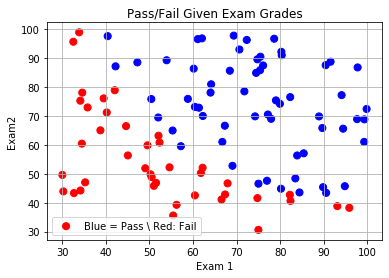

In [61]:
x1= df1[df1.columns[0]]
x2= df1[df1.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(df1[df1.columns[2]])

plt.scatter(x=x1,y=x2,s=50,c=cols, label = 'Blue = Pass \ Red: Fail') #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Exam Grades')

ax.set_ylabel('Exam2')
ax.set_xlabel('Exam 1')
ax.legend()


plt.grid(True)
plt.show()

In [62]:
#cost
#θ0, θ1 = symbols('θ0 ,θ1') 
x1 = np.asarray(x1)
x2 = np.asarray(x2)
y =  np.asarray(df1[df1.columns[2]])


In [63]:
x0 = np.ones((100,1))
x1 =  x1.reshape(100,1)
x2 =  x2.reshape(100,1)
y = y.reshape(100,1)

In [64]:
def sigmoid(X, thetas, y):
    
    product = np.matmul(X,thetas)
    
    return 1/(1+np.exp(-1*product)) - y

In [65]:
# def objective(thetas,X,y): 
    
#     new = sigmoid(X,thetas,y)
#     sum_of_Bx  = np.matmul(X.T, new)
    
    
#     return sum_of_Bx

In [66]:
def objective(thetas,X,y): 
    
    new = sigmoid(X,thetas,y)
    
    return new.sum()

In [67]:
X = np.concatenate((x0, x1, x2), axis = 1)
X = np.array(X, dtype=float)

In [68]:
y = np.array(y, dtype=float)

In [71]:
thetas0 = np.ones((3,1))

thetas = scipy.optimize.fmin(objective, thetas0, args = (X,y))

Optimization terminated successfully.
         Current function value: 4000.000000
         Iterations: 10
         Function evaluations: 49


In [73]:
thetas

array([1., 1., 1.])

In [ ]:
alpha = 0.001
m = 100

thetas = np.ones((3,1))

iterations = 100000

for i in range(iterations):
    
    new = sigmoid(X,thetas,y)
    
    bx  = np.matmul(X.T, new)
    print(new.sum())
    thetas =  thetas - bx * alpha/m 
       
    i+=1

In [ ]:
X.shape

In [ ]:
print(bx)

In [ ]:
thetas 

In [ ]:
1/(1+np.exp(-thetas[0]-thetas[1]*45-thetas[2]*85))

In [ ]:
x1 = np.asarray(x1)
x2 = np.asarray(x2)
y =  np.asarray(df1[df1.columns[2]])

alpha = 0.001
m = len(y)
theta2 = 1
theta1 = 1 # Initializatio 
theta0 = 1 # Initialization

track_cost = []

# You might consider rescaling your inputs -1<x<1

i= 0 
count =1
plotx =[]
ploty = []
iterations = 100000
while i < iterations:
    
    result0 = theta0 - np.sum((1/(1+np.exp(-theta0-theta1*x1-theta2*x2)))-y) * alpha/m
    result1 = theta1 - np.sum(np.multiply((1/(1+np.exp(-theta0-theta1*x1-theta2*x2)))-y,x1)) * alpha/m
    result2 = theta2 - np.sum(np.multiply((1/(1+np.exp(-theta0-theta1*x1-theta2*x2)))-y,x2)) * alpha/m
    #print(result0, result1,result2)
    
    
    theta0 = result0 
    theta1 = result1 
    theta2 = result2
    
    cost = np.sum((1/(1+np.exp(-theta0-theta1*x1-theta2*x2)))-y)
    track_cost.append(cost)
    
    i+=1
    #plotx.append(count)
    #ploty.append(np.sum(np.multiply((theta0+theta1*xs)-ys,xs)))
    #count +=1 
    
print(theta0, theta1, theta2)

In [ ]:
plt.plot(np.arange(0,iterations,1),track_cost);

In [ ]:
1/(1+np.exp(-theta0-theta1*45-theta2*85))
#should be 0.776

In [ ]:
1/(1+np.exp(-theta0-theta1*45-theta2*85))

In [ ]:
x1s = np.asarray(list(range(0,100)))
x2s = ((np.multiply(x1s, -theta1/theta2) - theta0 / theta2))

In [ ]:
x1= df1[df1.columns[0]]
x2= df1[df1.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(df1[df1.columns[2]])

plt.scatter(x=x1,y=x2,s=50,c=cols, label = 'Blue = Pass \ Red: Fail') #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Exam Grades')

ax.set_ylabel('Exam2')
ax.set_xlabel('Exam 1')
ax.legend()

plt.plot(x2s,x1s)
plt.grid(True)
plt.show()

In [ ]:
df1['Prediction'] = 1/(1+2.71828**(-theta0-theta1*x1-theta2*x2))
df1['Prediction'] = 1/(1+2.71828**(-thetas[0]-thetas[1]*x1-thetas[2]*x2))

In [ ]:
def get_prediction(df): 
    
    if df['Prediction']   >= 0.5 :  return 1
    else: return 0

In [ ]:
df1['Prediction2']= df1.apply(get_prediction ,axis = 1)
df1['Correct'] = df1['Prediction2'] == df1[df1.columns[2]]
df1.groupby(['Correct']).count()

In [ ]:
accuracy = 9/91

In [ ]:
1- accuracy

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
x1= df2[df2.columns[0]]
x2= df2[df2.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(df2[df2.columns[2]])

plt.scatter(x=x1,y=x2,s=50,c=cols, label = 'Blue = Pass \ Red: Fail') #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Exam Grades')

ax.set_ylabel('Exam2')
ax.set_xlabel('Exam 1')
ax.legend()


plt.grid(True)
plt.show()

In [ ]:
def feature_mapping(feature1, feature2):
    
    features = []   
    degree = 1
    
    for i in range(degree+1):
        for j in range(degree+1):
        
            if (i + j) < degree+1:
                
                features.append(feature1**(i) * feature2**(j))
                                
                #print(i,j)
                            
    return features
features = feature_mapping(1,1)
len(features)

In [ ]:
features_array = np.ones((1,len(features)))
x1= df2[df2.columns[0]]
x2= df2[df2.columns[1]]

for i in range(len(x1)): 
    
    row = feature_mapping(x1[i],x2[i])
    features_array = np.vstack([features_array, row])
# Deleting first row
features_array = np.delete(features_array, (0), axis=0)


In [ ]:
features_array.shape

In [ ]:
thetas = np.ones((len(features),1))
#thetas = thetas.transpose()
print(thetas.shape)

In [ ]:
y =  np.asarray(df2[df2.columns[2]])

#thetas = np.ones((len(features),1))
alpha = 0.001
m = len(y)

result = np.ones((len(features),1))
print(result.shape)
print(thetas.shape)


# You might consider rescaling your inputs -1<x<1
i= 0 

y  =  y.reshape((len(y), 1))
#features_array  =  features_array.reshape((len(features), len(y)))



while i < 1000000:
   
    for j in range(len(features)):
        
        hey = np.matmul(features_array,thetas)
        
       # print(hey.shape)
        
        
        new = 1/(1+np.exp(-1*hey)) - y 
        new = new.transpose()
       # print(y.shape)
        #print(new.shape)
        result[j] = thetas[j] - np.sum(np.multiply(new,features_array.T[j])) * alpha/m 
        #print(j,result[j], thetas[j])    
    thetas = result    
    
    i+=1
    
print(thetas)

In [ ]:
def get_power():
    powers =[]
    degree = 6
    
    for i in range(degree+1):
        for j in range(degree+1):
        
            if (i + j) < degree+1:
                powers.append([i,j])
    return powers

In [ ]:
powers = get_power()
z = 0 
x, y = symbols('x ,y')

for i in range(len(thetas)): 
    
    z = z + thetas[i]*y**powers[i][0]*x**powers[i][1]
z = z[0]


In [ ]:
x, y = symbols('x ,y')

        
z = 3.29845525+y*0.50361007-5.199775* y**2 -0.23009013*y**3-3.38379604*y**4 -0.11434627*y**5-1.61050115*y**6+x*2.19553631- 4.62570311*x*y -0.92911071*x*y**2 -1.32248414 * x*y**3-1.11935901*x*y**4-0.64746395* x* y**5 - x**2 *5.34419753-1.57338962*x**2*y -1.82330519* x**2*y**2-0.7526215* (x**2) *y**3 -0.64802721* x**2 * y**4 +1.1060586*x**3 +0.53121529*x**3*y+1.00956374*x**3*y**2+0.98173933*x**3 * y**3 - 4.09353481*x**4-0.30681322*x**4*y-0.2864696*x**4*y**2-0.38360677*x**5+0.93636891*x**5*y-3.0530421*x**6

In [ ]:
z

In [ ]:
from sympy import var, plot_implicit
var('x y')
#plot_implicit( 3.29845525+y*0.50361007-5.199775* y**2 -0.23009013*y**3-3.38379604*y**4 -0.11434627*y**5-1.61050115*y**6+x*2.19553631- 4.62570311*x*y -0.92911071*x*y**2 -1.32248414 * x*y**3-1.11935901*x*y**4-0.64746395* x* y**5 - x**2 *5.34419753-1.57338962*x**2*y -1.82330519* x**2*y**2-0.7526215* (x**2) *y**3 -0.64802721* x**2 * y**4 +1.1060586*x**3 +0.53121529*x**3*y+1.00956374*x**3*y**2+0.98173933*x**3 * y**3 - 4.09353481*x**4-0.30681322*x**4*y-0.2864696*x**4*y**2-0.38360677*x**5+0.93636891*x**5*y-3.0530421*x**6)
plot_implicit(z)
###################################################

x1,x2 = df2[df2.columns[0]],df2[df2.columns[1]]
x1 = np.asarray(x1)
x2 = np.asarray(x2)
y =  np.asarray(df2[df2.columns[2]])

fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols

# Create the colors list using the function above
cols=pltcolor(df2[df2.columns[2]])

plt.scatter(x=x1,y=x2,s=50,c=cols, label = 'Blue = Pass \ Red: Fail') #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Readings')

ax.set_ylabel('Test2')
ax.set_xlabel('Test1')
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
x,y = df2[df2.columns[0]],df2[df2.columns[1]]

df2['Prediction'] = 1/(1+2.71828**(3.29845525+y*0.50361007-5.199775* y**2 -0.23009013*y**3-3.38379604*y**4 -0.11434627*y**5-1.61050115*y**6+x*2.19553631- 4.62570311*x*y -0.92911071*x*y**2 -1.32248414 * x*y**3-1.11935901*x*y**4-0.64746395* x* y**5 - x**2 *5.34419753-1.57338962*x**2*y -1.82330519* x**2*y**2-0.7526215* (x**2) *y**3 -0.64802721* x**2 * y**4 +1.1060586*x**3 +0.53121529*x**3*y+1.00956374*x**3*y**2+0.98173933*x**3 * y**3 - 4.09353481*x**4-0.30681322*x**4*y-0.2864696*x**4*y**2-0.38360677*x**5+0.93636891*x**5*y-3.0530421*x**6))
#df2['Prediction'] = 1/(1+2.71828**(-thetas[0]-thetas[1]*x1-thetas[2]*x2))


df2['Prediction2'] = df2.apply(get_prediction ,axis = 1)
df2['Correct'] = df2['Prediction2'] == df2[df2.columns[2]]
df2.groupby(['Correct']).count()

In [ ]:
features_array = features_array.transpose()
features_array.shape

In [ ]:
x1 = np.asarray(x1)
x2 = np.asarray(x2)
y =  np.asarray(df2[df2.columns[2]])

alpha = 0.001
m = len(y)
theta2 = 1
theta1 = 1 # Initializatio 
theta0 = 1 # Initialization

track_cost = []
# You might consider rescaling your inputs -1<x<1

i= 0 
count =1
plotx =[]
ploty = []
while i < 300000:
    
    result0 = theta0 - np.sum((1/(1+2.71828**(-theta0-theta1*x1**2-theta2*x2**2)))-y) * alpha/m
    result1 = theta1 - np.sum(np.multiply((1/(1+np.exp**(-theta0-theta1*x1**2-theta2*x2**2)))-y,x1)) * alpha/m
    result2 = theta2 - np.sum(np.multiply((1/(1+np.exp**(-theta0-theta1*x1**2-theta2*x2**2)))-y,x2)) * alpha/m
    #print(result0, result1,result2)
    
    #print(x2[0],result1)
    theta0 = result0 
    theta1 = result1 
    theta2 = result2
    
    cost = np.sum((1/(1+np.exp(-theta0-theta1*x1**2-theta2*x2**2)))-y)
    track_cost.append(cost)
    i+=1
    #plotx.append(count)
    #ploty.append(np.sum(np.multiply((theta0+theta1*xs)-ys,xs)))
    #count +=1 
    
print(theta0, theta1, theta2)

In [ ]:
x1s = np.asarray(list(np.arange(-1,1,0.02)))
x1ss = np.asarray(list(np.arange(-1,1,0.02)))
print(x1s)

features_array2 = np.ones((1,len(features)))

for i in range(len(x1s)): 
    
    row = feature_mapping(x1s[i],x1ss[i])
    
    features_array2 = np.vstack([features_array2, row])
# Deleting first row


In [ ]:
features_array2 = np.delete(features_array2, (0), axis=0)

In [ ]:
features_array2 =features_array2.transpose()
features_array2.shape

In [ ]:
thetas = thetas.transpose()

In [ ]:
thetas.shape

In [ ]:
x2s = np.matmul(thetas,features_array2)
x2s = x2s.transpose()

In [ ]:
x1= df2[df2.columns[0]]
x2= df2[df2.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(df2[df2.columns[2]])

plt.scatter(x=x1,y=x2,s=50,c=cols, label = 'Blue = Pass \ Red: Fail') #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Exam Grades')

ax.set_ylabel('Exam2')
ax.set_xlabel('Exam 1')
ax.legend()

plt.plot(x2s,x1s)
plt.grid(True)
plt.show()